Application of ridge and lasso regression to find a separating hyperplane in a multivariate linear regression problem

In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp

In [2]:
df4 = pd.read_excel (r'regression.xlsx', header = None)

In [3]:
import matplotlib.pyplot as plt

# since b = 0, we do not need to worry about the intercept in the X matrix
X = df4.iloc[:,:8].values
y = df4.iloc[:,8].values

In [4]:
# define the loss function
def loss_fn(X, Y, a):
    return (cp.pnorm(Y - X @ a, p=2)**2)

In [5]:
# Linear regression

# Define and solve the CVXPY problem.
a = cp.Variable(df4.shape[1]-1)
cost = loss_fn(X, y, a)
prob = cp.Problem(cp.Minimize(cost))
prob.solve(solver=cp.SCS)
# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal coefficients a are")
print(np.round(a.value, 5))
print("The norm of the residual is ", cp.norm(y - X*a, p=2).value)
results = pd.DataFrame(a.value)
results.to_csv(index=True, path_or_buf = 'results_linear.csv')
#print(results.to_latex(index=False)) 


The optimal value is 43.067667806647854
The optimal coefficients a are
[ 0.56161  0.63634 -0.02075  0.09389  0.76359 -0.10662  0.06518  0.00417]
The norm of the residual is  6.5625961180852


In [6]:
# Before using lasso and ridge, we need to standardize the values in X and Y
y = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [7]:
# the regularizing function for lasso regression
def LASSO_regularize(a):
    return (cp.pnorm(a, p=1))

# a function to calculate the MSE
def mse(X, Y, a):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, a).value

In [8]:
lambda_vals = np.array([1, 10, 100, 1000])

In [9]:
# Ridge regression
errors = []
a_values = []
for l in lambda_vals:
    # solve for astar using the unique solution formula
    astar = np.dot(np.linalg.inv((np.dot(X.T, X) + np.dot(l,np.identity(X.shape[1])))),(np.matmul(X.T ,y)))
    # Print result.
    a_values.append(astar)
    errors.append(mse(X, y, astar))
    print("The optimal coefficients a at lambda =", l, "are:")
    print(np.round(astar, 5))
results = pd.DataFrame(a_values).T
results.to_csv(index=True, path_or_buf = 'results_ridge.csv')
#print(results.to_latex(index=False)) 

The optimal coefficients a at lambda = 1 are:
[ 0.56371  0.2301  -0.13218  0.11925  0.26843 -0.11385  0.0327   0.10369]
The optimal coefficients a at lambda = 10 are:
[ 0.48028  0.221   -0.09887  0.10373  0.23801 -0.02676  0.04183  0.07796]
The optimal coefficients a at lambda = 100 are:
[ 0.24546  0.14434 -0.00873  0.05754  0.15163  0.09414  0.05291  0.06383]
The optimal coefficients a at lambda = 1000 are:
[0.05741 0.03447 0.01017 0.01407 0.04265 0.0392  0.02501 0.02889]


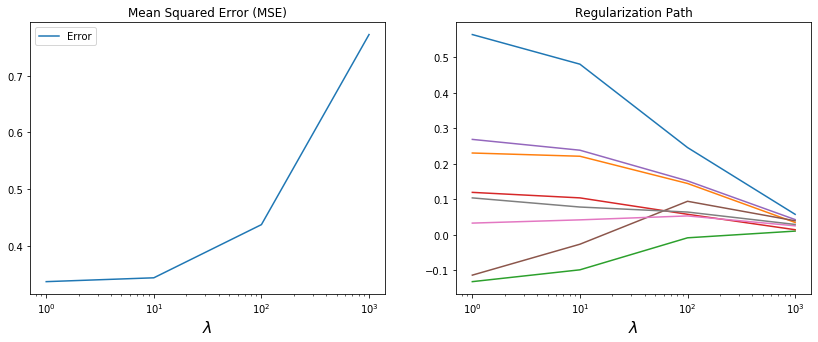

In [10]:
s = plt.figure(figsize=[14,5])

def plot_errors(errors, lambda_vals):
    plot1 = plt.subplot(121) 
    plt.plot(lambda_vals, errors, label="Error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    
def plot_regularization_path(lambda_values, beta_values):
    plot2 = plt.subplot(122) 
    num_coeffs = len(a_values[0])
    for i in range(num_coeffs):
        plt.plot(lambda_vals, [wi[i] for wi in a_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")

plot1 = plot_errors(errors, lambda_vals)
plot2 = plot_regularization_path(lambda_vals, a_values)

plt.show()

s.savefig('ridge.png')

In [11]:
# Lasso regression
errors = []
a_values = []
for l in lambda_vals:
    # Define and solve the CVXPY problem.
    a = cp.Variable(df4.shape[1]-1)
    cost = loss_fn(X, y, a) + l * LASSO_regularize(a)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve(solver=cp.SCS)
    errors.append(mse(X, y, a))
    a_values.append(a.value)
    # Print result.
    print("\nThe optimal value is", prob.value)
    print("The optimal coefficients a at lambda =", l, "are:")
    print(np.round(a.value, 5))
results = pd.DataFrame(a_values).T
results.to_csv(index=True, path_or_buf = 'results_lasso.csv')
#print(results.to_latex(index=False)) 


The optimal value is 34.20350175142907
The optimal coefficients a at lambda = 1 are:
[ 0.5617   0.22614 -0.122    0.11404  0.25855 -0.09385  0.02537  0.09591]

The optimal value is 44.742019262355804
The optimal coefficients a at lambda = 10 are:
[ 5.0706e-01  1.8537e-01 -8.9100e-03  4.9810e-02  2.0073e-01 -0.0000e+00
  1.0000e-05  3.7670e-02]

The optimal value is 92.34370137693918
The optimal coefficients a at lambda = 100 are:
[ 2.1899e-01 -1.0000e-05  0.0000e+00 -1.0000e-05  2.0000e-05  0.0000e+00
 -3.0000e-05  0.0000e+00]

The optimal value is 97.03443750064544
The optimal coefficients a at lambda = 1000 are:
[-1.e-05  1.e-05 -1.e-05  1.e-05 -0.e+00  2.e-05  0.e+00 -2.e-05]


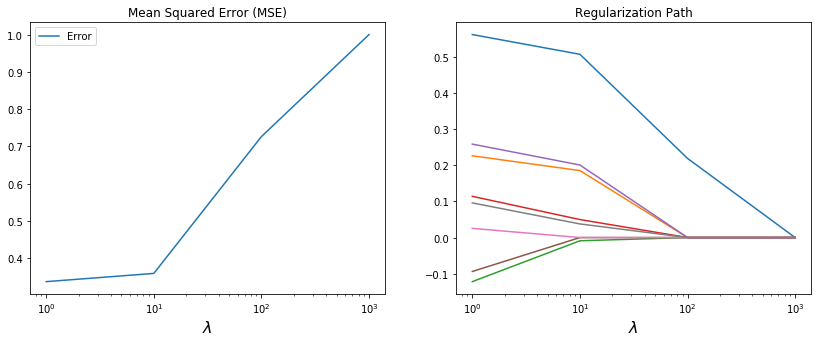

In [12]:
s = plt.figure(figsize=[14,5])

def plot_errors(errors, lambda_vals):
    plot1 = plt.subplot(121) 
    plt.plot(lambda_vals, errors, label="Error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    
def plot_regularization_path(lambda_values, beta_values):
    plot2 = plt.subplot(122) 
    num_coeffs = len(a_values[0])
    for i in range(num_coeffs):
        plt.plot(lambda_vals, [wi[i] for wi in a_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")

plot1 = plot_errors(errors, lambda_vals)
plot2 = plot_regularization_path(lambda_vals, a_values)

plt.show()

s.savefig('lasso.png')